In [32]:
#imports 
import numpy as np
import pandas as pd


In [33]:
#creates Linear regression & its used to model 
#the relationship between input features (X) and a target variable (y).
from sklearn.linear_model import LinearRegression

#split the dataset to train and test 
from sklearn.model_selection import train_test_split

#To evaluate the model’s performance.
#measures the average square [MSE] diff btw actual and perdeicted values
from sklearn.metrics import mean_squared_error

#To calculate Root Mean Squared Error (RMSE) from MSE.
from math import sqrt

#scipy → Scientific computing library in Python
#scipy.stats → Statistics module
#skew and kurtosis → Functions that describe the shape of data distribution

from scipy.stats import skew , kurtosis

In [34]:
# read csv
df = pd.read_csv("C:/Users/vdpbw/Downloads/Startups_dataset.csv")

In [35]:
#display first 5 row
df.head(5)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [36]:
#describes the summary in the csv
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,42.000000,42.000000,42.000000,42.000000
mean,86235.681905,122493.590238,237980.796190,123496.256905
std,38684.645464,27727.056966,106658.274938,32081.104881
min,20229.590000,51283.140000,0.000000,77798.830000
25%,62348.075000,103730.875000,166551.950000,98097.067500
50%,77528.560000,122699.795000,249791.995000,114893.525000
75%,118588.332500,145416.940000,304406.362500,145656.312500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [37]:
#split the dataset into train and test
train, test = train_test_split(df, test_size=0.3)

In [38]:
train

,R&D Spend,Administration,Marketing Spend,Profit
41,27892.92,84710.77,164470.71,77798.83
6,134615.46,147198.87,127716.82,156122.51
2,153441.51,101145.55,407934.54,191050.39
36,28663.76,127056.21,201126.82,90708.19
9,123334.88,108679.17,304981.62,149759.96
19,86419.70,153514.11,0.00,122776.86
18,91749.16,114175.79,294919.57,124266.90
40,28754.33,118546.05,172795.67,78239.91
26,75328.87,144135.98,134050.07,105733.54
0,165349.20,136897.80,471784.10,192261.83


In [39]:
test

,R&D Spend,Administration,Marketing Spend,Profit
39,38558.51,82982.09,174999.30,81005.76
28,66051.52,182645.56,118148.20,103282.38
33,55493.95,103057.49,214634.81,96778.92
24,77044.01,99281.34,140574.81,108552.04
10,101913.08,110594.11,229160.95,146121.95
4,142107.34,91391.77,366168.42,166187.94
27,72107.60,127864.55,353183.81,105008.31
14,119943.24,156547.42,256512.92,132602.65
32,63408.86,129219.61,46085.25,97427.84
11,100671.96,91790.61,249744.55,144259.40


In [40]:
print(train.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


In [42]:
#spliting the train into x, y by droping profit column in x
train_x = train.drop('Profit',axis=1) 

In [44]:
#contains only profit column
train_y =train['Profit']
train_y

41     77798.83
6     156122.51
2     191050.39
36     90708.19
9     149759.96
19    122776.86
18    124266.90
40     78239.91
26    105733.54
0     192261.83
16    126992.93
13    134307.35
8     152211.77
34     96712.80
1     191792.06
38     81229.06
3     182901.99
35     96479.51
31     97483.56
17    125370.37
5     156991.12
15    129917.04
29    101004.64
7     155752.60
22    110352.25
20    118474.03
23    108733.99
25    107404.34
21    111313.02
Name: Profit, dtype: float64

In [47]:
#same as train x, y
test_x = test.drop('Profit', axis=1)

In [46]:
test_y = test['Profit']

In [48]:
#creating  model for linear Regression
model = LinearRegression()

In [49]:
#fit the train, test
model.fit(train_x,train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
#predicting the profit for the data
pred = model.predict(test_x)

In [51]:
#check how well it fit
model.score(train_x,train_y)

0.9645503736035889

In [53]:
#coefficients
model.coef_

array([ 0.75082374, -0.05407241,  0.03068201])

In [54]:
model.intercept_ 

np.float64(58896.89923830272)

In [56]:
#Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse =mean_squared_error(pred, test_y)
rsme = sqrt(mse)
rsme

8213.08657543673

In [58]:
#plotting and visualizing data
import matplotlib.pyplot as plt

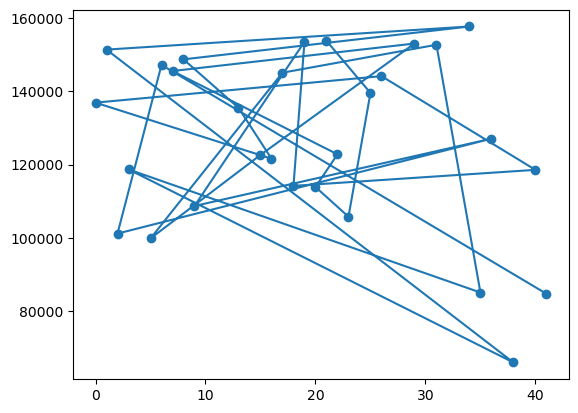

In [69]:
#plots for all col
plt.plot(train_x['Administration'], marker='o')

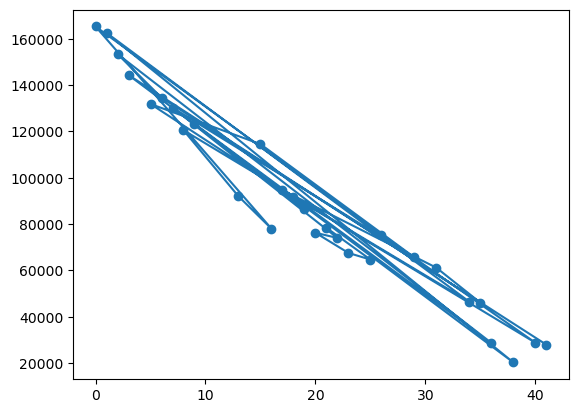

In [70]:
plt.plot(train_X['R&D Spend'], marker='o')

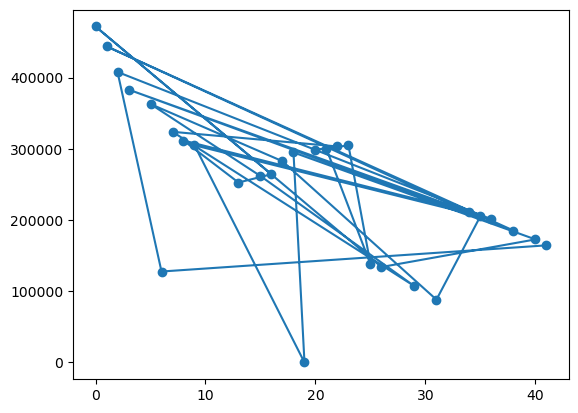

In [71]:
plt.plot(train_x['Marketing Spend'], marker='o') 

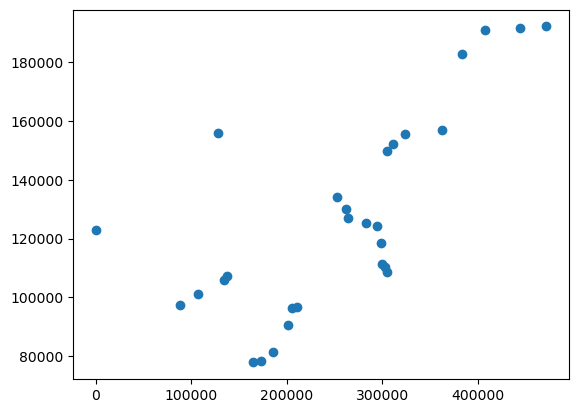

In [73]:
#scatter graph with y 
plt.scatter(train_x['Marketing Spend'],train_y)

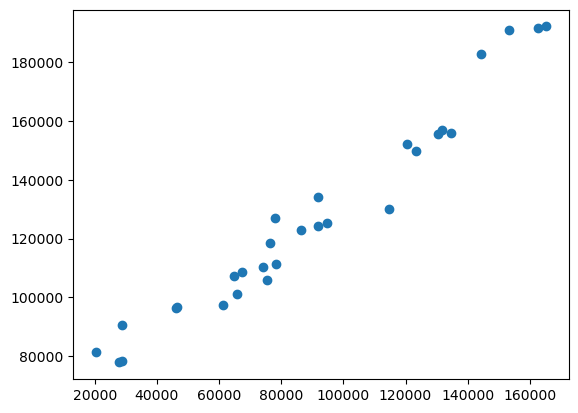

In [74]:
plt.scatter(train_x['R&D Spend'],train_y) 

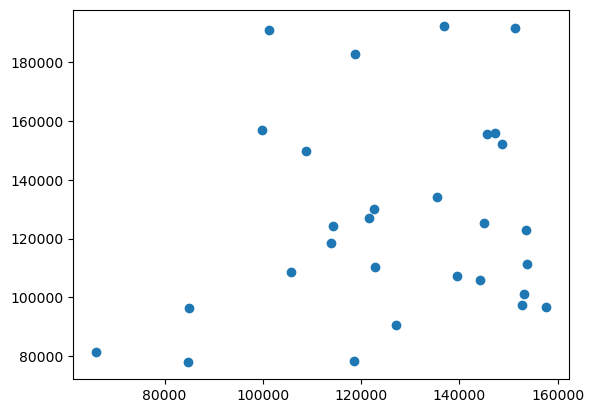

In [75]:
plt.scatter(train_x['Administration'],train_y) 

In [76]:
#creatin 2nd linear regression to compare
model2 = LinearRegression()

In [77]:
ntrain_x = train_x.drop('Administration',axis=1)

In [79]:
ntest_x = test_x.drop('Administration',axis=1)

In [80]:
model2.fit(ntrain_x,train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
model2.score(ntrain_x,train_y) 

0.9634579703757808

In [82]:
y_pred = model2.predict(ntest_x)

In [83]:
mse = mean_squared_error(y_pred,test_y) 
rmse = sqrt(mse) 
rmse 

8277.572675587737

concludes:

Lower RMSE = predictions are closer to actual values.
Higher RMSE = predictions are farther from actual values.

Model 1 RMSE = 8213.09

Model 2 RMSE = 8277.57

The difference is: 8277.57−8213.09=64.48
Model 1 is slightly better than Model 2 in terms of RMS